<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_11_Pandas Explode.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

## 🟨 Bar Plot of Top Skills for Cloud Engineers (2.11.1)

In [8]:
df_exploded = df.explode('job_skills')


In [13]:
skill_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()


In [14]:
df_skill_count = skill_count.reset_index(name='skill_count')

In [18]:
df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)

In [19]:
df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [20]:
job_title = 'Cloud Engineer'
top_skills = 10

df_cloud_engineer = df_skill_count[df_skill_count['job_title_short'] == job_title].head(10)

df_cloud_engineer

,job_title_short,job_skills,skill_count
364,Cloud Engineer,python,3116
237,Cloud Engineer,aws,3075
238,Cloud Engineer,azure,2943
395,Cloud Engineer,sql,2227
317,Cloud Engineer,linux,1637
409,Cloud Engineer,terraform,1607
315,Cloud Engineer,kubernetes,1554
304,Cloud Engineer,java,1217
288,Cloud Engineer,gcp,1200
269,Cloud Engineer,docker,1152


Text(0.5, 1.0, 'Top 10 Most Common Skills for Cloud Engineer')

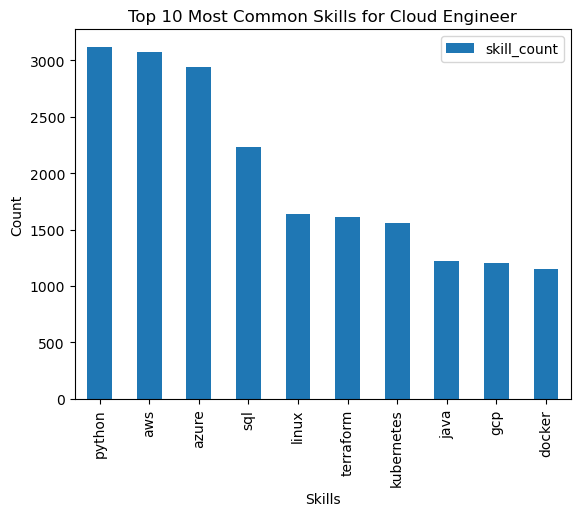

In [21]:
df_cloud_engineer.plot(kind='bar', x='job_skills', y='skill_count')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title(f'Top {top_skills} Most Common Skills for {job_title}')

In [23]:
# ANOTHER WAY !!!!!!!
#df_CE = df[df['job_title_short'] == 'Cloud Engineer']
#df_exploded_1 = df_CE.explode('job_skills')
#skill_counts = df_exploded_1['job_skills'].value_counts().head(10)
#skill_counts


job_skills
python        3116
aws           3075
azure         2943
sql           2227
linux         1637
terraform     1607
kubernetes    1554
java          1217
gcp           1200
docker        1152
Name: count, dtype: int64

---

## 🟨 Average Salary by Skill (2.11.2)

In [24]:
df_exploded_2 = df.explode('job_skills')                          

In [25]:
df_exploded_2

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [36]:
avg_s_for_skill = df_exploded_2.groupby('job_skills')['salary_year_avg'].mean()



In [37]:
avg_s_for_skill = avg_s_for_skill.reset_index(name='avg_s_for_skill')


In [38]:
avg_s_for_skill = avg_s_for_skill.sort_values(by='avg_s_for_skill', ascending=False)
avg_s_for_skill.head(5)

,job_skills,avg_s_for_skill
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


---

## 🟥 Unique Skills Count (2.11.3)

In [58]:
df_exploded_3 = df.explode('job_skills')


In [59]:
unique_skills_count = df_exploded_3.groupby('job_title_short')['job_skills'].nunique()
unique_skills_count

job_title_short
Business Analyst             223
Cloud Engineer               213
Data Analyst                 235
Data Engineer                239
Data Scientist               237
Machine Learning Engineer    222
Senior Data Analyst          207
Senior Data Engineer         226
Senior Data Scientist        215
Software Engineer            239
Name: job_skills, dtype: int64

In [60]:
unique_skills_count = unique_skills_count.reset_index()
unique_skills_count

,job_title_short,job_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237
5,Machine Learning Engineer,222
6,Senior Data Analyst,207
7,Senior Data Engineer,226
8,Senior Data Scientist,215
9,Software Engineer,239


In [61]:
unique_skills_count.columns = ['job_title_short', 'num_unique_skills']       # rename columns

In [62]:
unique_skills_count.head(5)

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237


---